In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('glow_up.csv')
df.head(10)

,Campaign ID,Campaign Name,Start Date,End Date,Channel,Spend,Leads Generated,Conversions,Revenue Generated,Clicks,Impressions
0,CMP008,App Install,4/12/2024,5/6/2024,Email,7970.24,23,11,15040.35,368.0,4416.0
1,CMP012,Referral Drive,5/29/2024,6/23/2024,Social Media,5955.15,25,1,1692.09,277.0,3324.0
2,CMP007,Lead Boost,2/28/2024,3/13/2024,Event,9898.08,7,5,5449.46,495.0,3465.0
3,CMP008,Festive Sale,3/29/2024,4/16/2024,Social Media,10882.43,24,15,27554.91,261.0,NaN
4,CMP012,Lead Boost,2/19/2024,3/2/2024,Influencer,2407.07,8,6,13391.30,407.0,2442.0
5,CMP013,Referral Drive,9/26/2024,10/16/2024,Search Ads,11715.16,44,16,27479.63,290.0,3480.0
6,CMP017,App Install,1/15/2024,2/1/2024,Email,2071.79,48,8,17490.28,84.0,1092.0
7,CMP005,Festive Sale,10/15/2024,10/24/2024,Event,3240.33,12,2,2860.78,NaN,3500.0
8,CMP007,Referral Drive,8/1/2024,8/8/2024,Influencer,9296.60,5,1,2110.64,NaN,3276.0
9,CMP015,Product Launch,2/11/2024,2/28/2024,Search Ads,3811.31,8,6,10965.06,198.0,2178.0


In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df.columns

Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'spend', 'leads_generated', 'conversions', 'revenue_generated',
       'clicks', 'impressions'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        300 non-null    object 
 1   campaign_name      300 non-null    object 
 2   start_date         300 non-null    object 
 3   end_date           300 non-null    object 
 4   channel            300 non-null    object 
 5   spend              300 non-null    float64
 6   leads_generated    300 non-null    int64  
 7   conversions        300 non-null    int64  
 8   revenue_generated  300 non-null    float64
 9   clicks             259 non-null    float64
 10  impressions        258 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.9+ KB


In [6]:
df.isna().sum()

campaign_id           0
campaign_name         0
start_date            0
end_date              0
channel               0
spend                 0
leads_generated       0
conversions           0
revenue_generated     0
clicks               41
impressions          42
dtype: int64

In [7]:
click_mean =  df['clicks'].mean().round(2)
impression_mean =  df['impressions'].mean().round(2)

In [8]:
df['clicks'] = df['clicks'].fillna(click_mean)
df['impressions'] = df['impressions'].fillna(impression_mean)

# Exprolatery Data Analysis #

Text(0.5, 1.0, 'Campaign Spent')

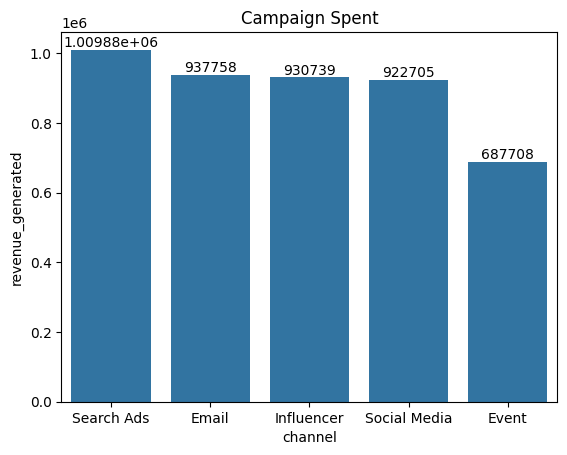

In [9]:
# Campaign Spend: Total money spent per campaign.

campaign_spend = df.groupby('channel',as_index=False)['revenue_generated'].sum().sort_values(by='revenue_generated',ascending=False)
ax = sns.barplot(data= campaign_spend,x='channel',y='revenue_generated')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Campaign Spent')

Text(0.5, 1.0, 'Leads Generated by Channels')

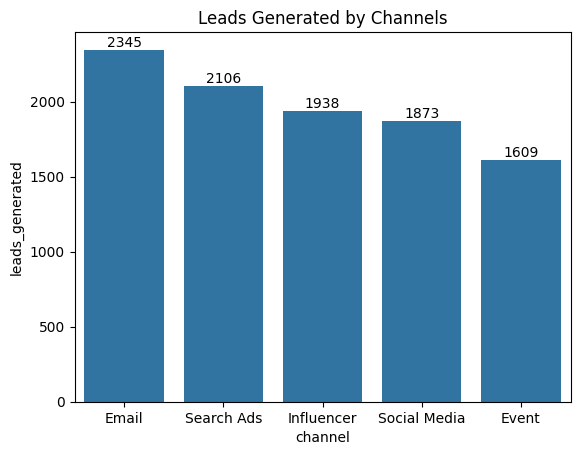

In [10]:
# Leads Generated: Number of potential customers acquired.
total_leads = df.groupby('channel',as_index=False)['leads_generated'].sum().sort_values(by='leads_generated',ascending=False)

ax= sns.barplot(data=total_leads,x='channel',y='leads_generated')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Leads Generated by Channels')

Text(0.5, 1.0, 'Customers by Campaign Name')

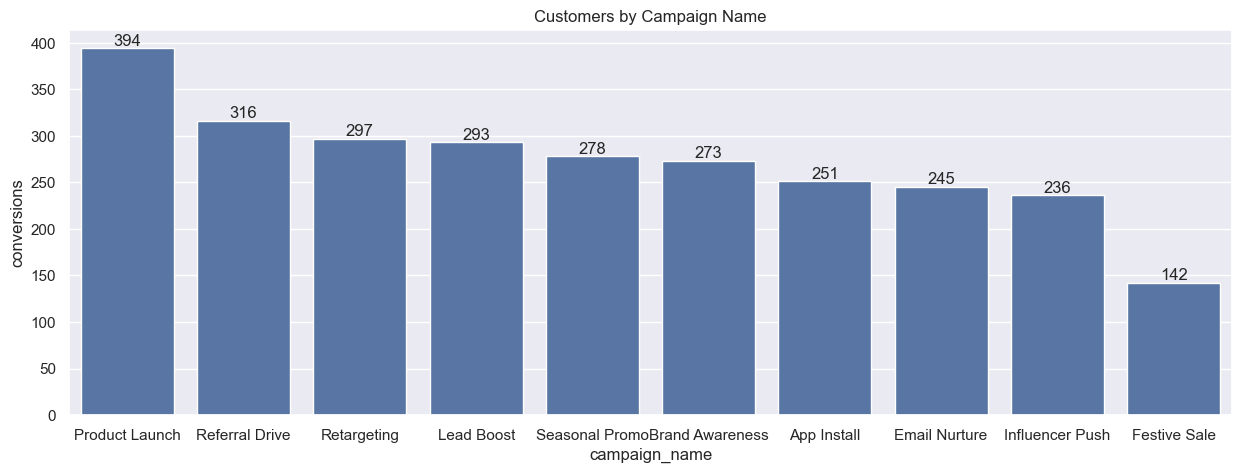

In [11]:
# Conversions: Number of customers who made a purchase.

total_conversion = df.groupby('campaign_name',as_index=False)['conversions'].sum().sort_values(by='conversions',ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=total_conversion,x ='campaign_name',y='conversions')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Customers by Campaign Name')

In [12]:
df['campaign_name'].unique()

array(['App Install', 'Referral Drive', 'Lead Boost', 'Festive Sale',
       'Product Launch', 'Seasonal Promo', 'Retargeting',
       'Influencer Push', 'Brand Awareness', 'Email Nurture'],
      dtype=object)

Text(0.5, 1.0, 'Revenue Generated by Channels')

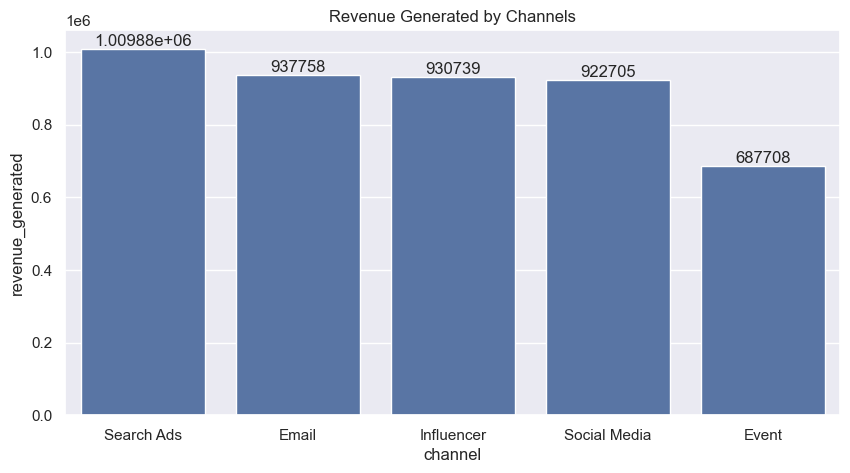

In [13]:
# Revenue Generated: Total sales attributable to each campaign.
total_revenue=df.groupby('channel',as_index=False)['revenue_generated'].sum().sort_values(by='revenue_generated',ascending=False).round()

sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data=total_revenue,x='channel',y='revenue_generated')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Revenue Generated by Channels')

In [14]:
df.head()

,campaign_id,campaign_name,start_date,end_date,channel,spend,leads_generated,conversions,revenue_generated,clicks,impressions
0,CMP008,App Install,4/12/2024,5/6/2024,Email,7970.24,23,11,15040.35,368.0,4416.00
1,CMP012,Referral Drive,5/29/2024,6/23/2024,Social Media,5955.15,25,1,1692.09,277.0,3324.00
2,CMP007,Lead Boost,2/28/2024,3/13/2024,Event,9898.08,7,5,5449.46,495.0,3465.00
3,CMP008,Festive Sale,3/29/2024,4/16/2024,Social Media,10882.43,24,15,27554.91,261.0,2393.39
4,CMP012,Lead Boost,2/19/2024,3/2/2024,Influencer,2407.07,8,6,13391.30,407.0,2442.00


In [15]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "akash123" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "glow_up"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "campaign"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'campaign' in database 'glow_up'.
